# KNN - NSL

In [13]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [15]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')
    
    limit = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit]
    Y_train = df_train.iloc[:,limit]
    
    return X_train, Y_train, df_train

X_train, Y_train, df_train = load_train_dataset()

In [16]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')

    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [17]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.2,stratify = Y_train,
                                                    shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (91459, 77)
Validation X : (22865, 77)
Test_X       : (22514, 77)
Training_Y   : (91459,)
Validation Y : (22865,)
Test_Y       : (22514,)


In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors = 4, p = 1, weights ='distance').fit(X_train,Y_train)

In [28]:
test_predictions = knn_classifier.predict(X_test)

print("Cross-Validation set accuracy: {:.4f} %".format((cross_val_score(knn_classifier, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.4f} %".format(knn_classifier.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions)*100))

Cross-Validation set accuracy: 99.4664 %
Train set accuracy           : 99.9978 %
Test set accuracy            : 77.6273 %


In [20]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))


Test set precision : 0.9238
Test set recall    : 0.6536
Test set F1-score  : 0.7656


True Negatives  : 0.93
False Positives : 0.07
False Negatives : 0.35
True Positives  : 0.65


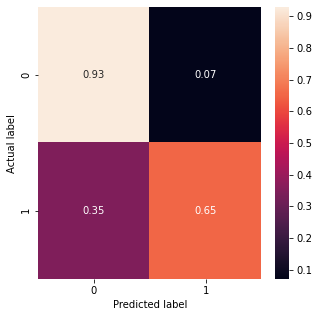

In [21]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p, normalize= 'true')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".2f")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))
    
plot_cm(Y_test, test_predictions)

In [22]:
print(classification_report(Y_test, test_predictions))


              precision    recall  f1-score   support

           0       0.67      0.93      0.78      9711
           1       0.92      0.65      0.77     12803

    accuracy                           0.77     22514
   macro avg       0.80      0.79      0.77     22514
weighted avg       0.81      0.77      0.77     22514



In [23]:
from sklearn.metrics import roc_curve, auc

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


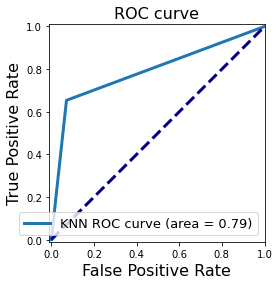

In [24]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [25]:
knn_classifier.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [26]:
n_neighbors = list(range(1,100,1))
p=[1,2]

param_grid = [{'n_neighbors' : n_neighbors, 
               'p':p},]

optimal_params = GridSearchCV(
    estimator = knn_classifier,
    param_grid = param_grid,
    cv=2,
    scoring ='accuracy',
    verbose = 2)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 198 candidates, totalling 396 fits
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... n_neighbors=1, p=1, total=  15.5s
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV] ............................... n_neighbors=1, p=1, total=  10.0s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ............................... n_neighbors=1, p=2, total=  12.0s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ............................... n_neighbors=1, p=2, total=  11.2s
[CV] n_neighbors=2, p=1 ..............................................
[CV] ............................... n_neighbors=2, p=1, total=  10.2s
[CV] n_neighbors=2, p=1 ..............................................
[CV] ............................... n_neighbors=2, p=1, total=  11.4s
[CV] n_neighbors=2, p=2 ..............................................
[CV] ............................... n_neighbors=2, p=2, total=  13.3s
[CV] n_neighbors=2, p=2 ..............................................
[CV] ............................... n_neighbors=2, p=2, total=  13.8s
[CV] n_neighbors=3, p=1 ..............................................
[CV] .

[CV] .............................. n_neighbors=15, p=2, total=  12.8s
[CV] n_neighbors=16, p=1 .............................................
[CV] .............................. n_neighbors=16, p=1, total=  10.5s
[CV] n_neighbors=16, p=1 .............................................
[CV] .............................. n_neighbors=16, p=1, total=  11.2s
[CV] n_neighbors=16, p=2 .............................................
[CV] .............................. n_neighbors=16, p=2, total=  11.9s
[CV] n_neighbors=16, p=2 .............................................
[CV] .............................. n_neighbors=16, p=2, total=  12.3s
[CV] n_neighbors=17, p=1 .............................................
[CV] .............................. n_neighbors=17, p=1, total=  10.5s
[CV] n_neighbors=17, p=1 .............................................
[CV] .............................. n_neighbors=17, p=1, total=  11.5s
[CV] n_neighbors=17, p=2 .............................................
[CV] .

[CV] .............................. n_neighbors=30, p=1, total=  13.6s
[CV] n_neighbors=30, p=2 .............................................
[CV] .............................. n_neighbors=30, p=2, total=  14.0s
[CV] n_neighbors=30, p=2 .............................................
[CV] .............................. n_neighbors=30, p=2, total=  14.9s
[CV] n_neighbors=31, p=1 .............................................
[CV] .............................. n_neighbors=31, p=1, total=  12.8s
[CV] n_neighbors=31, p=1 .............................................
[CV] .............................. n_neighbors=31, p=1, total=  13.5s
[CV] n_neighbors=31, p=2 .............................................
[CV] .............................. n_neighbors=31, p=2, total=  14.1s
[CV] n_neighbors=31, p=2 .............................................
[CV] .............................. n_neighbors=31, p=2, total=  14.9s
[CV] n_neighbors=32, p=1 .............................................
[CV] .

[CV] .............................. n_neighbors=44, p=2, total=  15.4s
[CV] n_neighbors=45, p=1 .............................................
[CV] .............................. n_neighbors=45, p=1, total=  13.6s
[CV] n_neighbors=45, p=1 .............................................
[CV] .............................. n_neighbors=45, p=1, total=  14.3s
[CV] n_neighbors=45, p=2 .............................................
[CV] .............................. n_neighbors=45, p=2, total=  14.9s
[CV] n_neighbors=45, p=2 .............................................
[CV] .............................. n_neighbors=45, p=2, total=  15.6s
[CV] n_neighbors=46, p=1 .............................................
[CV] .............................. n_neighbors=46, p=1, total=  13.6s
[CV] n_neighbors=46, p=1 .............................................
[CV] .............................. n_neighbors=46, p=1, total=  14.3s
[CV] n_neighbors=46, p=2 .............................................
[CV] .

[CV] .............................. n_neighbors=59, p=1, total=  12.8s
[CV] n_neighbors=59, p=2 .............................................
[CV] .............................. n_neighbors=59, p=2, total=  13.0s
[CV] n_neighbors=59, p=2 .............................................
[CV] .............................. n_neighbors=59, p=2, total=  13.8s
[CV] n_neighbors=60, p=1 .............................................
[CV] .............................. n_neighbors=60, p=1, total=  12.1s
[CV] n_neighbors=60, p=1 .............................................
[CV] .............................. n_neighbors=60, p=1, total=  12.5s
[CV] n_neighbors=60, p=2 .............................................
[CV] .............................. n_neighbors=60, p=2, total=  12.9s
[CV] n_neighbors=60, p=2 .............................................
[CV] .............................. n_neighbors=60, p=2, total=  13.8s
[CV] n_neighbors=61, p=1 .............................................
[CV] .

[CV] .............................. n_neighbors=73, p=2, total=  13.9s
[CV] n_neighbors=74, p=1 .............................................
[CV] .............................. n_neighbors=74, p=1, total=  12.0s
[CV] n_neighbors=74, p=1 .............................................
[CV] .............................. n_neighbors=74, p=1, total=  12.7s
[CV] n_neighbors=74, p=2 .............................................
[CV] .............................. n_neighbors=74, p=2, total=  13.1s
[CV] n_neighbors=74, p=2 .............................................
[CV] .............................. n_neighbors=74, p=2, total=  13.7s
[CV] n_neighbors=75, p=1 .............................................
[CV] .............................. n_neighbors=75, p=1, total=  12.0s
[CV] n_neighbors=75, p=1 .............................................
[CV] .............................. n_neighbors=75, p=1, total=  12.8s
[CV] n_neighbors=75, p=2 .............................................
[CV] .

[CV] .............................. n_neighbors=88, p=1, total=  14.1s
[CV] n_neighbors=88, p=2 .............................................
[CV] .............................. n_neighbors=88, p=2, total=  13.4s
[CV] n_neighbors=88, p=2 .............................................
[CV] .............................. n_neighbors=88, p=2, total=  15.3s
[CV] n_neighbors=89, p=1 .............................................
[CV] .............................. n_neighbors=89, p=1, total=  12.4s
[CV] n_neighbors=89, p=1 .............................................
[CV] .............................. n_neighbors=89, p=1, total=  13.2s
[CV] n_neighbors=89, p=2 .............................................
[CV] .............................. n_neighbors=89, p=2, total=  13.6s
[CV] n_neighbors=89, p=2 .............................................
[CV] .............................. n_neighbors=89, p=2, total=  15.1s
[CV] n_neighbors=90, p=1 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed: 110.1min finished


{'n_neighbors': 4, 'p': 1}


In [24]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50,2)

training_scores, test_scores = validation_curve(knn_classifier,X_train,Y_train, 
                          param_name = 'n_neighbors',
                          param_range=param_range,
                          cv = 2,
                          scoring = 'f1_weighted',
                          verbose=2)
train_score = np.mean(training_scores, axis=1)
test_score = np.mean(test_scores, axis=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total= 2.4min
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s


[CV] .................................... n_neighbors=3, total= 2.5min
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total= 2.6min
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total= 3.6min
[CV] n_neighbors=9 ...................................................
[CV] .................................... n_neighbors=9, total= 3.1min
[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total= 3.0min
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total= 4.1min
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total= 4.6min
[CV] n_neighbors=17 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 266.8min finished


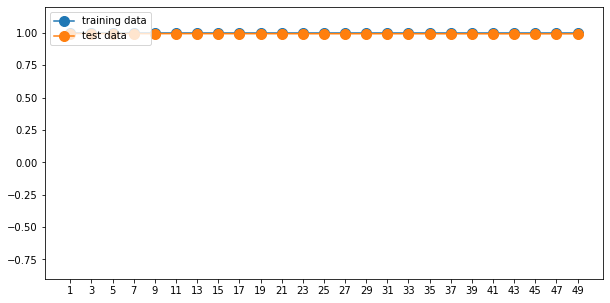

In [25]:
plt.figure(figsize=(10,5))
plt.plot(param_range, train_score, '-o' , label='training data', markersize=10)
plt.plot(param_range, test_score, '-o' , label='test data', markersize=10)
plt.ylim(-0.9001,1.2001)
plt.xticks(param_range)
plt.legend(loc=2)

In [26]:
i = 0
dict = {}
for neighbor, score in zip(param_range,zip(train_score,test_score)):
    dict[i] = {'n_neighbor': neighbor, 
            'train_score': score[0],
            'test_score':score[1]}
    i += 1

val_df = pd.DataFrame(dict).T
val_df

,n_neighbor,train_score,test_score
0,1.0,0.99996,0.994993
1,3.0,0.99996,0.994883
2,5.0,0.99996,0.994582
3,7.0,0.99996,0.994362
4,9.0,0.99996,0.994232
5,11.0,0.99996,0.994232
6,13.0,0.99996,0.994141
7,15.0,0.99996,0.993931
8,17.0,0.99996,0.993801
9,19.0,0.99996,0.993891


In [27]:
print('Max. Test Score: ',val_df['test_score'].max())
print('Max. Test Score index: ',val_df['test_score'].idxmax())

Max. Test Score:  0.9949926888751628
Max. Test Score index:  0
